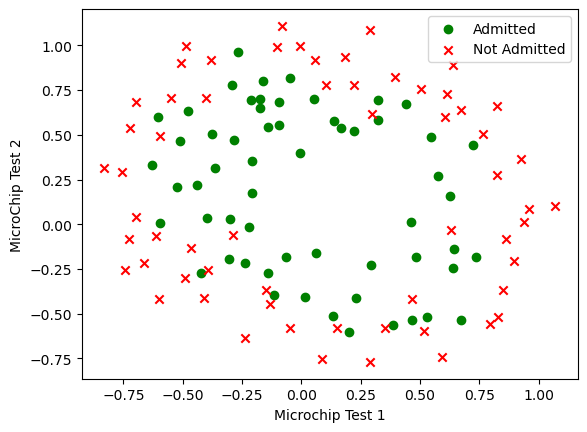

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

microchip_test1_label = "Microchip Test 1"
microchip_test2_label = "MicroChip Test 2"
admitted_label = "Admitted"

#读取数据
datas = pd.read_csv("./ex2data2.txt", header=None, names=[microchip_test1_label, microchip_test2_label, admitted_label])
# 获取数据个数
m = len(datas)
# 对数据进行分组
positive = datas.groupby(admitted_label).get_group(1)
negative = datas.groupby(admitted_label).get_group(0)

# 绘图
plt.scatter(x=positive[microchip_test1_label], y=positive[microchip_test2_label], marker='o', c='g', label='Admitted')
plt.scatter(x=negative[microchip_test1_label], y=negative[microchip_test2_label], marker='x', c='r',
            label='Not Admitted')
plt.legend()
plt.xlabel(microchip_test1_label)
plt.ylabel(microchip_test2_label)
plt.show()

In [12]:
x = datas.iloc[:, 0:2]
y = np.array(datas.iloc[:, 2:3])


# feature mapping 特征值映射
def feature_mapping(x_param):
    degree = 6
    x1 = x_param.iloc[:, 0]
    x2 = x_param.iloc[:, 1]
    # 创建一个空的对象用于返回
    result = pd.DataFrame()
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            result['F' + str(i) + str(j)] = np.power(x1, i - j) * np.power(x2, j)
    # 插入 bias 列
    result.insert(0, 'bias', 1)
    return result


x = feature_mapping(x)
x = np.array(x)

In [13]:
# 定义几个函数


# 定义 sigmoid 函数
def sigmoid(z_param):
    return 1 / (1 + np.exp(-z_param))


# 定义预测函数
def h_fun(theta_param, x_param):
    return sigmoid(x_param @ theta_param)


# 定义损失函数
def cost(theta_param, x_param, y_param, learn_rate):
    theta_param = np.reshape(theta_param, (x.shape[1], 1))
    tmp_1 = np.multiply(y_param, np.log(h_fun(theta_param, x_param)))
    tmp_2 = np.multiply(1 - y_param, (1 - np.log(h_fun(theta_param, x_param))))
    return -1 / m * np.sum(tmp_1 + tmp_2) + learn_rate / 2 * m * np.sum(np.power(theta_param, 2))


# 定义梯度函数
def gradient(theta_param, x_param, y_param, learn_rate):
    theta_param = np.reshape(theta_param, (x.shape[1], 1))
    cpy_theta_param = theta_param
    tmp = h_fun(theta_param, x_param)
    theta_param = (x_param.T @ (tmp - y_param)) / len(x_param)
    theta_param[:, 1:] -= learn_rate / len(x_param) * cpy_theta_param[:, 1:]
    return theta_param

In [14]:
# 使用 fminunc
import scipy.optimize as opt

theta = np.zeros((x.shape[1],))

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y, 0))

theta = result[0]
print(theta)

[ 4.18819893e+00  2.96749625e-02  1.43065696e+00 -3.59760820e+01
 -1.21566766e+01  5.48833491e+00 -1.10052224e+01  2.30720849e+01
  4.41189466e+01  1.05041923e+01  1.41201113e+02  5.12377404e+01
  3.07159063e+01 -1.45483890e+01 -4.55573935e+01  3.88951417e+01
 -2.83240890e+01 -5.64696046e+01 -1.80717588e+01 -1.41052848e+00
  2.00097592e+01 -1.90079738e+02 -9.47387019e+01 -1.30746853e+01
  5.75478957e+01 -1.25493272e+02 -8.01690151e+01 -3.06995219e+00]


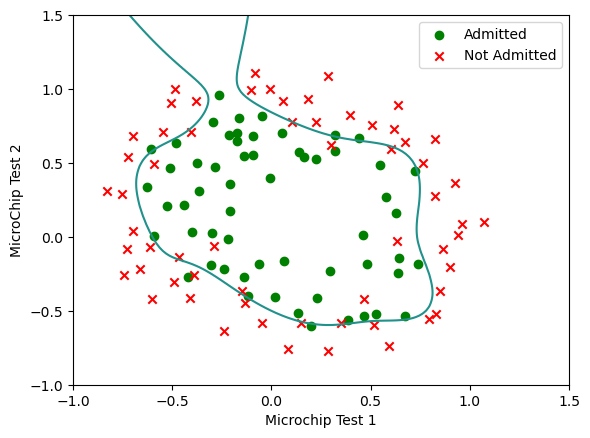

In [15]:
# 绘图 (这里的绘图我是抄别人的，因为我对 numpy 和 matplotlib这几个库不是很了解，所以我就不发表我的拙见了)
# 准备用于绘制决策边界的数据

# 特征工程
def featureMapping(x1, x2, degree):
    data = {}
    for i in np.arange(degree + 1):
        for j in np.arange(i + 1):
            data["F{}{}".format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    pass
    return pd.DataFrame(data)


plt_x = np.linspace(-1, 1.5, 150)
plt_xx, plt_yy = np.meshgrid(plt_x, plt_x)
z = np.array(featureMapping(plt_xx.ravel(), plt_yy.ravel(), 6))
z = z @ theta
z = z.reshape(plt_xx.shape)

# 绘图
plt.scatter(x=positive[microchip_test1_label], y=positive[microchip_test2_label], marker='o', c='g', label='Admitted')
plt.scatter(x=negative[microchip_test1_label], y=negative[microchip_test2_label], marker='x', c='r',
            label='Not Admitted')
plt.legend()
plt.xlabel(microchip_test1_label)
plt.ylabel(microchip_test2_label)
plt.contour(plt_xx, plt_yy, z, 0)
plt.show()